In [1]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, IsolationForest

## 1. Carga y exploración inicial del dataset

In [2]:
# Cargar el dataset (ajusta la ruta si es necesario)
df = pd.read_csv('annthyroid_21feat_normalised.csv')

print('Shape del dataset:', df.shape)
df.head()

Shape del dataset: (7200, 22)


,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20,class
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000,0
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625,0
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750,0
3,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688,0
4,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Dim_0     7200 non-null   float64
 1   Dim_1=0   7200 non-null   int64  
 2   Dim_2=0   7200 non-null   int64  
 3   Dim_3=0   7200 non-null   int64  
 4   Dim_4=0   7200 non-null   int64  
 5   Dim_5=0   7200 non-null   int64  
 6   Dim_6=0   7200 non-null   int64  
 7   Dim_7=0   7200 non-null   int64  
 8   Dim_8=0   7200 non-null   int64  
 9   Dim_9=0   7200 non-null   int64  
 10  Dim_10=0  7200 non-null   int64  
 11  Dim_11=0  7200 non-null   int64  
 12  Dim_12=0  7200 non-null   int64  
 13  Dim_13=0  7200 non-null   int64  
 14  Dim_14=0  7200 non-null   int64  
 15  Dim_15=0  7200 non-null   int64  
 16  Dim_16    7200 non-null   float64
 17  Dim_17    7200 non-null   float64
 18  Dim_18    7200 non-null   float64
 19  Dim_19    7200 non-null   float64
 20  Dim_20    7200 non-null   floa

,count,mean,std,min,25%,50%,75%,max
Dim_0,7200.0,0.531790,0.197156,0.0,0.375,0.5625,0.6875,1.0
Dim_1=0,7200.0,0.695694,0.460145,0.0,0.000,1.0000,1.0000,1.0
Dim_2=0,7200.0,0.869444,0.336937,0.0,1.000,1.0000,1.0000,1.0
Dim_3=0,7200.0,0.984583,0.123212,0.0,1.000,1.0000,1.0000,1.0
Dim_4=0,7200.0,0.987222,0.112322,0.0,1.000,1.0000,1.0000,1.0



Distribución de la variable class (0 = sano, 1 = enfermedad):
class
0    6666
1     534
Name: count, dtype: int64

Proporciones:
class
0    0.925833
1    0.074167
Name: proportion, dtype: float64


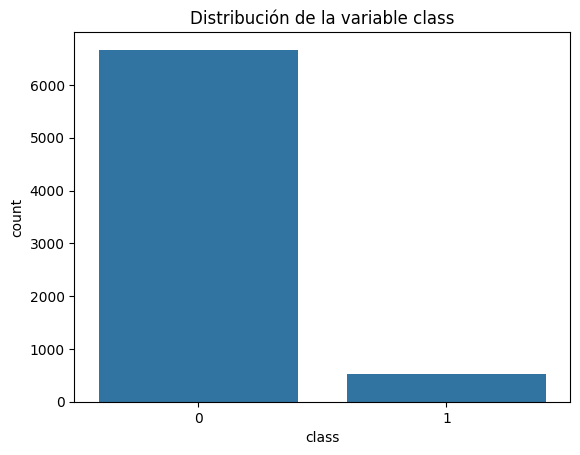

In [3]:
# Información general y distribución de la clase
df.info()

print('\nEstadísticos descriptivos (primeras columnas):')
display(df.describe().T.head())

print('\nDistribución de la variable class (0 = sano, 1 = enfermedad):')
print(df['class'].value_counts())
print('\nProporciones:')
print(df['class'].value_counts(normalize=True))

sns.countplot(data=df, x='class')
plt.title('Distribución de la variable class')
plt.show()

## 2. Preparación de datos para el modelo supervisado

Separamos variables predictoras (**X**) y la variable objetivo (**y**), y dividimos en conjuntos de entrenamiento y prueba.

In [4]:
# Separar features y target
X = df.drop(columns=['class'])
y = df['class']

# División train/test con estratificación por la clase
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((5760, 21), (1440, 21))

## 3. Modelo supervisado de clasificación (Random Forest)

Entrenamos un bosque aleatorio para clasificar pacientes con o sin enfermedad de la tiroides.

--- Modelo Supervisado: Random Forest ---
Accuracy: 0.9965277777777778

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.999     0.997     0.998      1333
           1      0.964     0.991     0.977       107

    accuracy                          0.997      1440
   macro avg      0.981     0.994     0.988      1440
weighted avg      0.997     0.997     0.997      1440



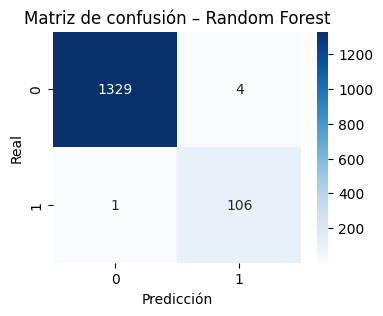

In [5]:
# Entrenamiento del modelo supervisado
clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Evaluación en el conjunto de prueba
y_pred = clf.predict(X_test)

print('--- Modelo Supervisado: Random Forest ---')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión – Random Forest')
plt.show()

## 4. Modelo no supervisado de detección de anomalías (Isolation Forest)

Ahora entrenamos un modelo no supervisado que **no utiliza la etiqueta `class` para entrenar**, y luego comparamos las anomalías detectadas con los pacientes realmente enfermos.

- `IsolationForest` aprende qué regiones del espacio de características son “normales”.
- Puntos que son fáciles de aislar se consideran **anómalos** (potenciales enfermos).

--- Modelo No Supervisado: Isolation Forest ---
Accuracy: 0.8930555555555556

Reporte de clasificación (comparado con class real):
              precision    recall  f1-score   support

           0      0.928     0.959     0.943      1333
           1      0.127     0.075     0.094       107

    accuracy                          0.893      1440
   macro avg      0.528     0.517     0.519      1440
weighted avg      0.869     0.893     0.880      1440



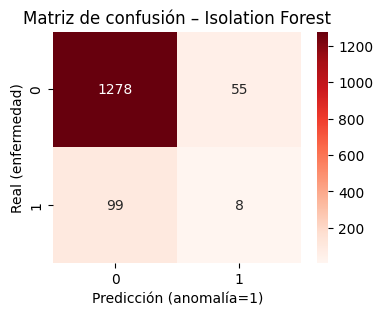

In [6]:
# Entrenamiento de Isolation Forest SOLO con X_train
iso = IsolationForest(
    contamination=0.05,  # fracción esperada de anomalías (ajústalo según el problema)
    random_state=42
)
iso.fit(X_train)

# Predicciones en X_test (-1 = outlier, 1 = inlier)
y_pred_iso_raw = iso.predict(X_test)

# Mapeamos: outlier (-1) -> 1 (enfermedad), inlier (1) -> 0 (sano)
y_pred_iso = np.where(y_pred_iso_raw == -1, 1, 0)

print('--- Modelo No Supervisado: Isolation Forest ---')
print('Accuracy:', accuracy_score(y_test, y_pred_iso))
print('\nReporte de clasificación (comparado con class real):')
print(classification_report(y_test, y_pred_iso, digits=3))

cm_iso = confusion_matrix(y_test, y_pred_iso)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_iso, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicción (anomalía=1)')
plt.ylabel('Real (enfermedad)')
plt.title('Matriz de confusión – Isolation Forest')
plt.show()

## 5. Comparación y análisis

- Compare **accuracy, recall y precision** para la clase positiva (enfermedad) entre:
  - El modelo supervisado (Random Forest).
  - El modelo no supervisado (Isolation Forest).
- Analice:
  - ¿Qué modelo detecta mejor a los pacientes enfermos (mayor *recall*)?
  - ¿Cuál genera más falsos positivos (pacientes sanos marcados como enfermos)?
  - ¿Cómo influye el parámetro `contamination` en el modelo de anomalías?

A partir de estas observaciones redacte sus **conclusiones** sobre el uso de enfoques supervisados vs no supervisados en este problema clínico.